In [3]:
import bagpy
from bagpy import bagreader
import matplotlib.pyplot as plt
import pandas as pd

## Read bag


In [5]:
bag_name = 'baselines1.bag'

b = bagreader(bag_name)

[INFO]  Successfully created the data folder baselines1.


In [6]:
csv_files = []
for topic in b.topics:
    #print(topic)
    data = b.message_by_topic(topic)
    csv_files.append(data)

In [7]:
print(csv_files)

['baselines1/hpe-lhand_x.csv', 'baselines1/hpe-lhand_y.csv', 'baselines1/hpe-rhand_x.csv']


In [11]:
lhand_x = pd.read_csv(csv_files[0]); lhand_y = pd.read_csv(csv_files[1]); 

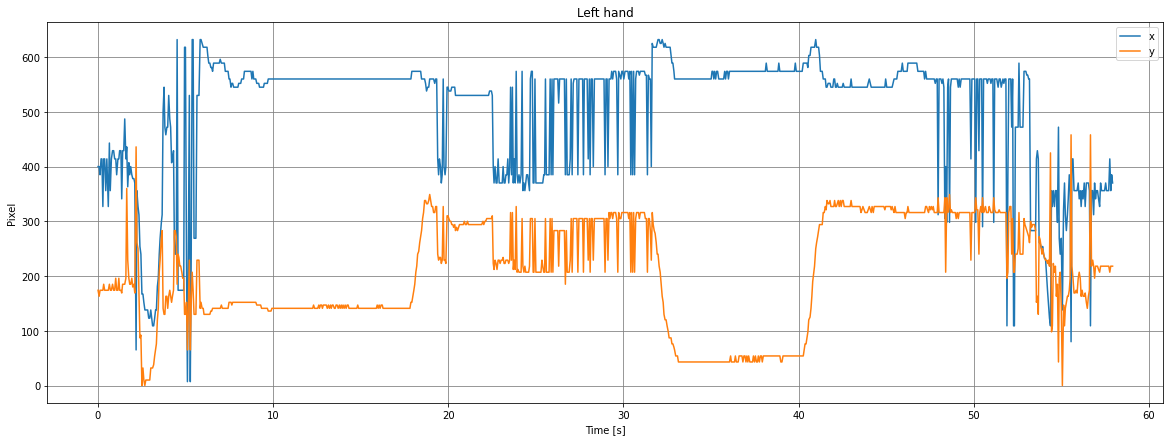

In [54]:
def scale_any_time(time):    
    scaled_time = pd.Series([t - time[0] for t in time])    
    return scaled_time

def plot_one_hand(x, y, title=None): 
    """
    x -> x pixel values from wrist keypoints 
    y -̣> y pixel values from wrist keypoints
    """
    
    w, h = 20, 7
    
    plt.figure(figsize=(w, h))
    
    scaled_tx = scale_any_time(x['Time'])
    scaled_ty = scale_any_time(y['Time'])
    
    plt.plot(scaled_tx, x['data'], label="x")
    plt.plot(scaled_ty, y['data'], label="y")
    plt.grid(color="grey")
    plt.title("{}".format(title))
    plt.xlabel("Time [s]")
    plt.ylabel("Pixel")
    plt.legend(loc='best')
    
plot_one_hand(lhand_x, lhand_y, "Left hand")

def plot_two_hands(x1, y1, x2, y2):
    """
    """
    
    w, h = 20, 10
    
    fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(w, h))
    ax1 = plt.subplot(211)
    ax1.plot(x1['Time'] - min(x1['Time']), x1['data'], label='x')
    ax1.plot(y1['Time'] - min(y1['Time']), y1['data'], label='y')
    ax1.set_ylabel('Pixel')
    ax1.grid(True)
    ax1.set_title('Left hand')
    
    ax2 = plt.subplot(212)
    ax2.plot(x2['Time'] - min(x2['Time']), x2['data'], label='x')
    ax2.plot(y2['Time'] - min(y2['Time']), y2['data'], label='y')
    ax2.set_ylabel('Pixel')
    ax2.grid(True)
    ax2.set_title('Right hand')
    plt.show()



## Filtering time series: 

Interesting resource for learning manipulation with [time series](https://bookdown.org/rdpeng/timeseriesbook/filtering-time-series.html).

Implementation of low-pass filter in python can be found [here](https://medium.com/analytics-vidhya/how-to-filter-noise-with-a-low-pass-filter-python-885223e5e9b7) 

Interesting stuff on filtering can be found [here](https://pysdr.org/content/filters.html). 

## TODO: 

- [ ] Plot both hands
- [ ] Add drawing of hand movements
- [ ] Define plot procedure and corresponding time for each movement
- [ ] Test different filtering techniques 

## Open questions: 

- [ ] find lib with good filter implementations for CPP

## 1. Experiment 


![Experimental procedure](hpe_images/InitialTestingProcedure.png)

In first experiment we move arms in different way to estimate how good our pose estimation for wrists is. 
Idea is to use human pose estimation for control of different subsystems of coupled UAV with manipulator. 

Testing period is approximately 15 seconds, and in that period we estimate quality of our predictions by
plotting x,y pixel positons of left and right wrist. We move from different phases as shown on image above. 
Image is mirrored. 

Purpose of this experiments is to test different linear filtering techniques which could be used to 
make our predictions better. 


[INFO]  Data folder baselines2 already exists. Not creating.
['baselines2/hpe-lhand_x.csv', 'baselines2/hpe-lhand_y.csv', 'baselines2/hpe-rhand_x.csv', 'baselines2/hpe-rhand_y.csv']


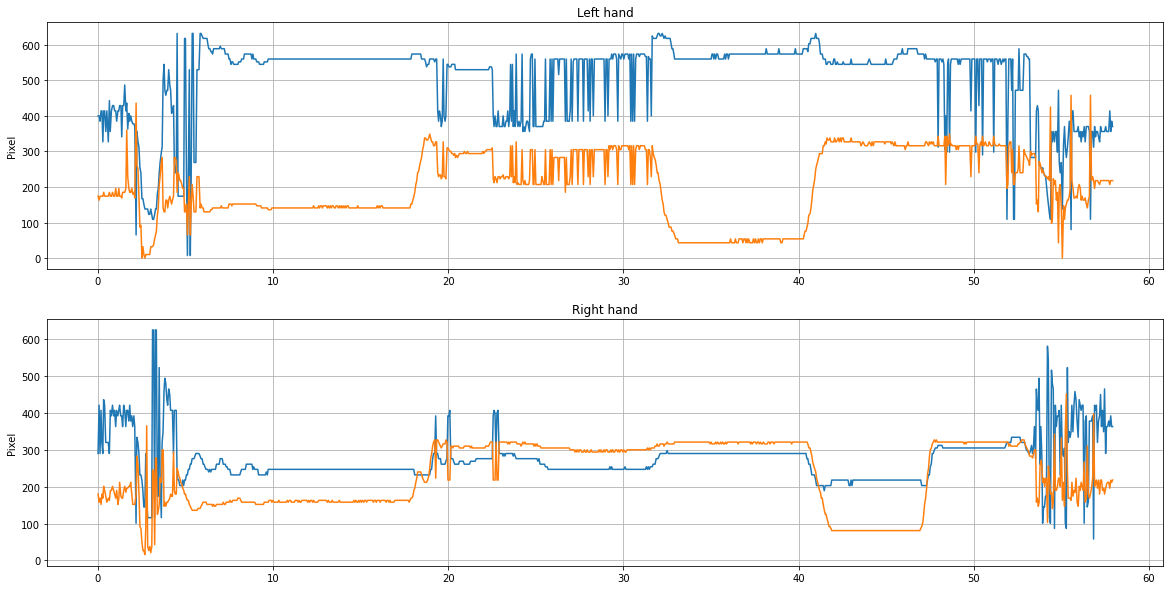

In [71]:
bag_name = 'baselines2.bag'

b = bagreader(bag_name)

csv_files = []
for topic in b.topics:
    #print(topic)
    data = b.message_by_topic(topic)
    csv_files.append(data)
    
print(csv_files)

lhand_x = pd.read_csv(csv_files[0]); lhand_y = pd.read_csv(csv_files[1]); 
rhand_x = pd.read_csv(csv_files[2]); rhand_y = pd.read_csv(csv_files[3]);

plot_two_hands(lhand_x, lhand_y, rhand_x, rhand_y)



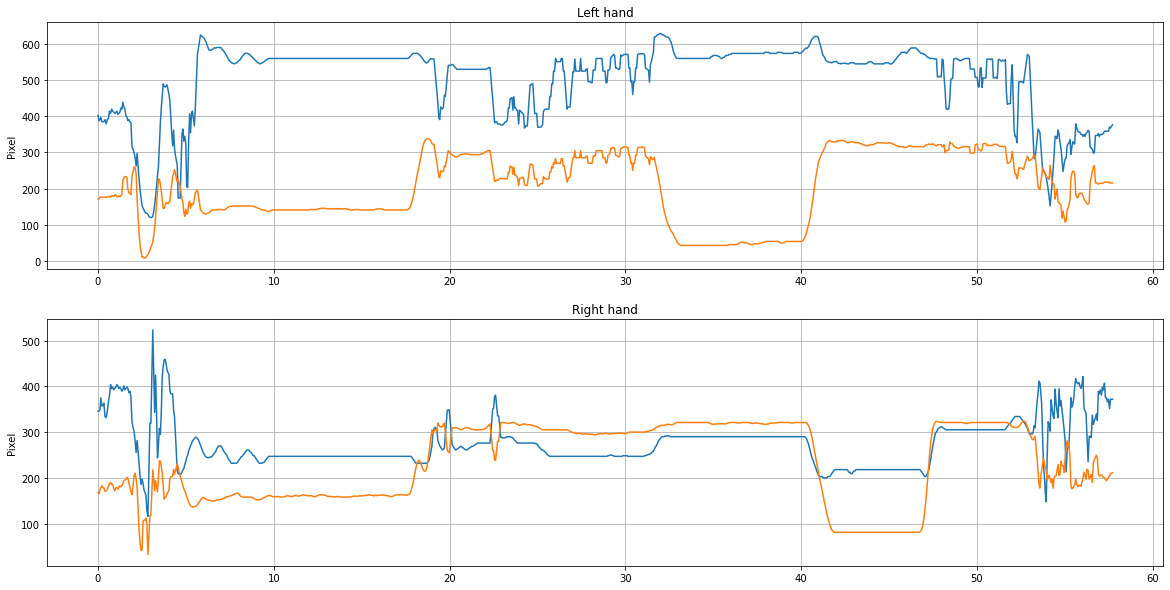

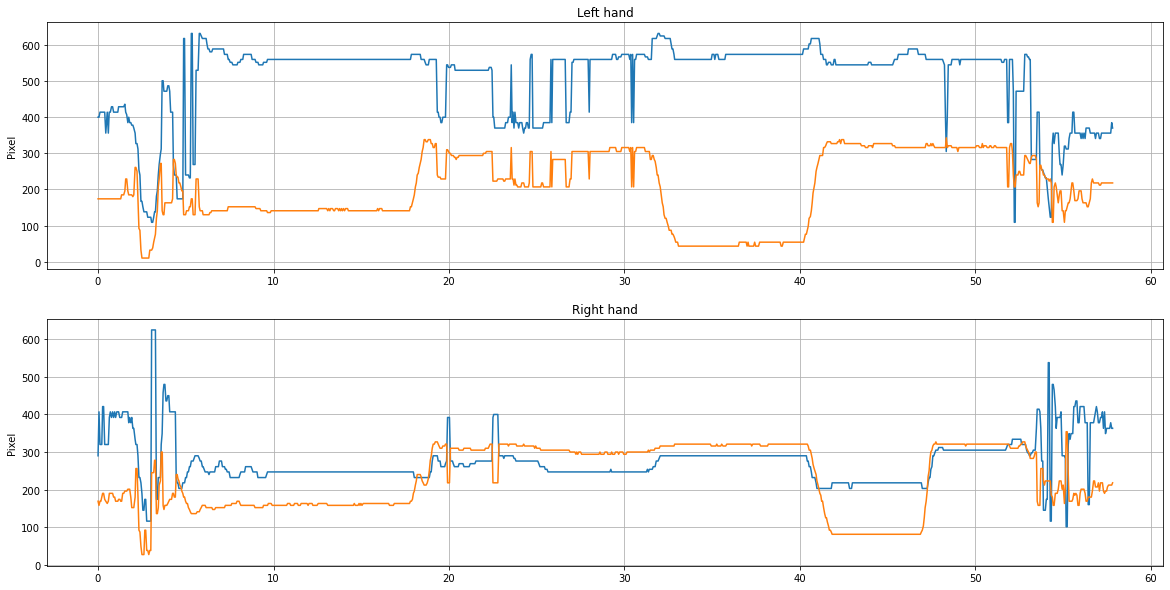

In [92]:
def average_both_hands(x1, y1, x2, y2, window_=3): 
    
    x1_avg = x1.rolling(window=window_).sum()/window_
    y1_avg = y1.rolling(window=window_).sum()/window_
    x2_avg = x2.rolling(window=window_).sum()/window_
    y2_avg = y2.rolling(window=window_).sum()/window_
    
    plot_two_hands(x1_avg[window_-1:], y1_avg[window_-1:], x2_avg[window_-1:], y2_avg[window_-1:])

    
def median_both_hands(x1, y1, x2, y2, window_=3): 
    
    x1_median = x1.rolling(window=window_).median()
    y1_median = y1.rolling(window=window_).median()
    x2_median = x2.rolling(window=window_).median()
    y2_median = y2.rolling(window=window_).median()
    
    
    plot_two_hands(x1_median[window_-1:], y1_median[window_-1:], x2_median[window_-1:], y2_median[window_-1:])

    
average_both_hands(lhand_x, lhand_y, rhand_x, rhand_y, window_=5)
median_both_hands(lhand_x, lhand_y, rhand_x, rhand_y, window_=3)